Preprocesamiento

In [56]:
import numpy as np
import matplotlib.pyplot as plt


In [72]:
# Load the data from the CSV file
file_path = '/Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp2ml/machineLearning/data/processed/toyota_dev_processed.csv'
data = np.genfromtxt(file_path, delimiter=',')
 
# Asignación de variables para las columnas
# vehicle_id_col = data[:, 0]         # Columna del ID del Vehículo
# year_col = data[:, 1]               # Columna del Año de Fabricación
# vehicle_type_col = data[:, 2]       # Columna del Tipo de Vehículo
# color_cols = data[:, 3:11]          # Columnas para el Color
# fuel_type_cols = data[:, 11:15]     # Columnas para el Tipo de Combustible
# transmission_cols = data[:, 15:17]  # Columnas para la Transmisión
# motor_col = data[:, 18]             # Columna del Motor
# kilometers_col = data[:, 19]        # Columna de Kilómetros Recorridos
# seller_type_cols = data[:, 20:23]   # Columnas para el Tipo de Vendedor
# price_col = data[:, 23]             # Columna del Precio

# Definición de las columnas
vehicle_id_col = data[:, 0]          # Columna del ID del Vehículo
year_col = data[:, 1]                # Columna del Año de Fabricación
vehicle_type_col = data[:, 2]        # Columna del Tipo de Vehículo
color_cols = data[:, 3:11]           # Columnas para el Color
fuel_type_cols = data[:, 11:16]      # Columnas para el Tipo de Combustible (ahora ocupa 5 columnas)
transmission_cols = data[:, 16:18]   # Columnas para la Transmisión
motor_col = data[:, 18]              # Columna del Motor
kilometers_col = data[:, 19]         # Columna de Kilómetros Recorridos
seller_type_cols = data[:, 20:23]    # Columnas para el Tipo de Vendedor
price_col = data[:, 23]              # Columna del Precio

print(fuel_type_cols.shape)
print("Fuel Encoding:", fuel_type_cols[:10])
print("Transmission Encoding:", transmission_cols[:10])
unique_fuel_types = np.unique(data[:, 4])


(965, 5)
Fuel Encoding: [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
Transmission Encoding: [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Ejercicio 1a

1. 

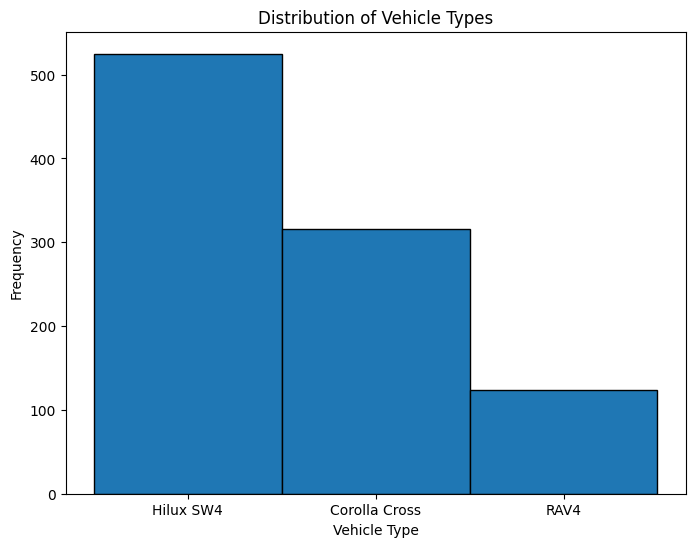

In [14]:
vehicle_types = ['Hilux SW4', 'Corolla Cross', 'RAV4'] 

plt.figure(figsize=(8, 6))
counts, bins, _ = plt.hist(vehicle_type_col, bins=3, edgecolor='black', align='mid')  # 'type' is at index 2
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Frequency')

plt.xticks([(bins[i] + bins[i+1])/2 for i in range(len(vehicle_types))], vehicle_types)

plt.show()


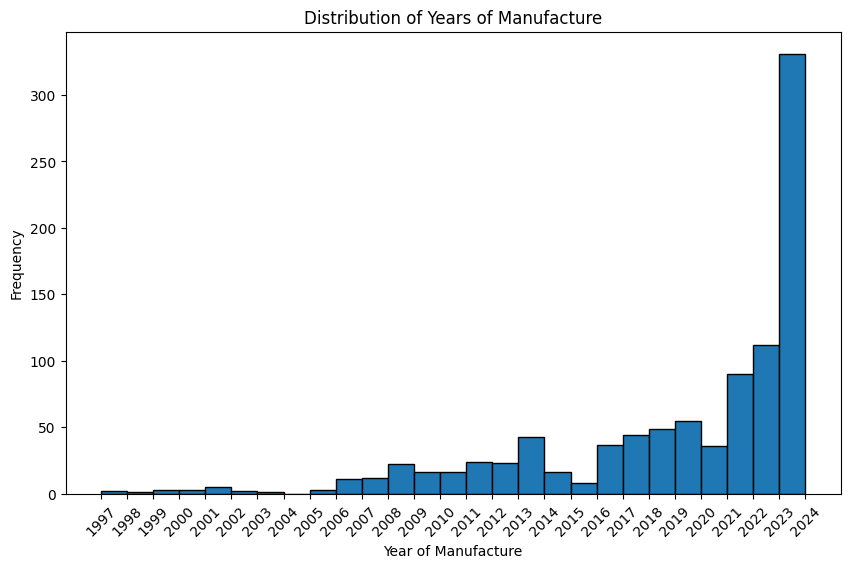

In [15]:
import matplotlib.pyplot as plt

# Define the range of years (from the minimum to the maximum year in your data)
min_year = int(min(year_col.astype(float)))
max_year = int(max(year_col.astype(float)))

# Plot histogram for years of manufacture with exact year bins
plt.figure(figsize=(10, 6))
plt.hist(year_col.astype(float), bins=range(min_year, max_year + 1), edgecolor='black', align='mid')  # 'year' is at index 1
plt.title('Distribution of Years of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Frequency')
plt.xticks(range(min_year, max_year + 1), rotation=45)  # Ensure all years are labeled on the x-axis

plt.show()


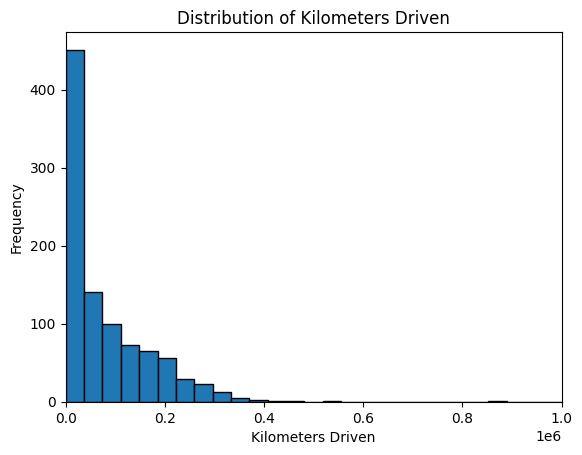

In [16]:

plt.hist(kilometers_col, bins=30, edgecolor='black')  
plt.xlim(0, 1000000)  
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.title('Distribution of Kilometers Driven')
plt.show()


2. 

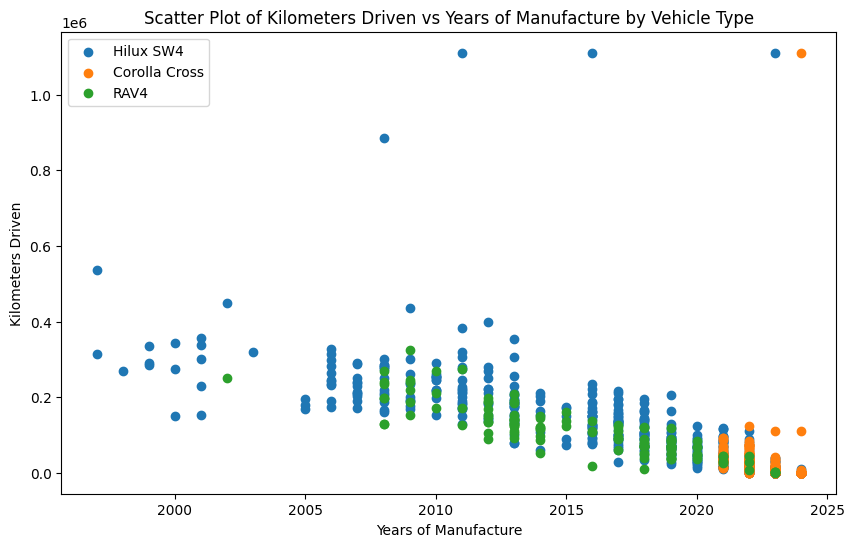

In [80]:
years_of_manufacture = year_col
kilometers_driven = kilometers_col
vehicle_type = vehicle_type_col

vehicle_types = ['Hilux SW4', 'Corolla Cross', 'RAV4']

plt.figure(figsize=(10, 6))

for i, v_type in enumerate(vehicle_types, start=1):
    plt.scatter(years_of_manufacture[vehicle_type == i],
                kilometers_driven[vehicle_type == i],
                label=v_type)

plt.title("Scatter Plot of Kilometers Driven vs Years of Manufacture by Vehicle Type")
plt.xlabel("Years of Manufacture")
plt.ylabel("Kilometers Driven")
plt.legend()
plt.show()


3. 

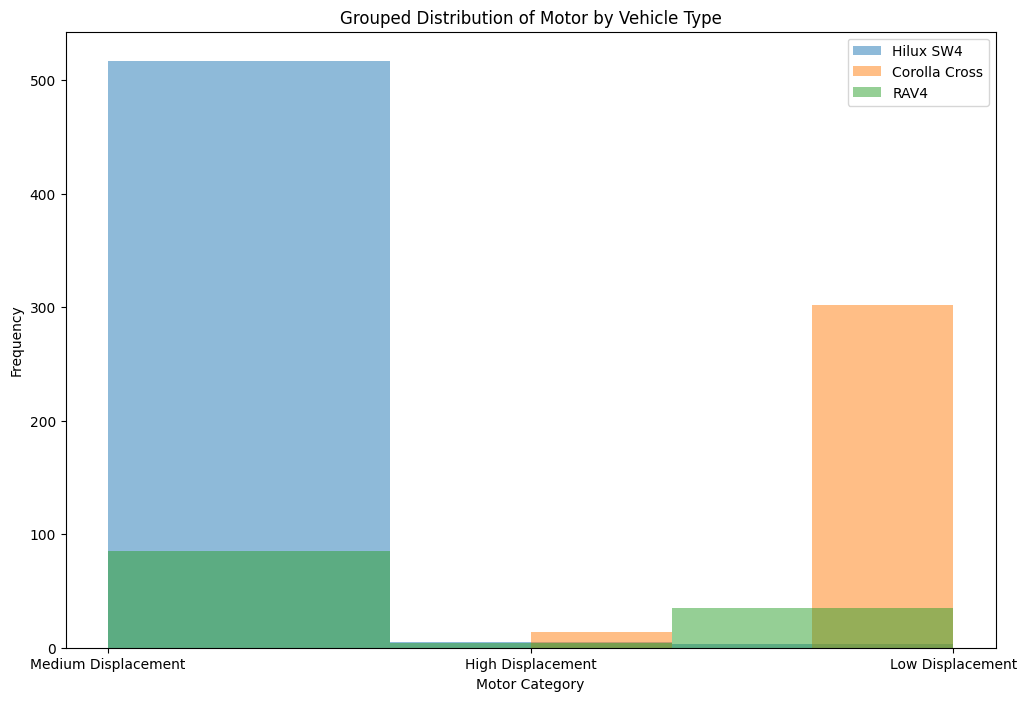

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def group_motor_values(motor):
    motor = float(motor)
    if motor <= 2.0:
        return 'Low Displacement'
    elif 2.0 < motor <= 3.0:
        return 'Medium Displacement'
    else:
        return 'High Displacement'

vehicle_types = ['Hilux SW4', 'Corolla Cross', 'RAV4']

grouped_motor_data = np.array([group_motor_values(motor) for motor in motor_col])

# Plot the grouped motor distribution by vehicle type
plt.figure(figsize=(12, 8))

for i, v_type in enumerate(vehicle_types, start=1):
    plt.hist(grouped_motor_data[vehicle_type_col == i], bins=3, alpha=0.5, label=v_type)

plt.title("Grouped Distribution of Motor by Vehicle Type")
plt.xlabel("Motor Category")
plt.ylabel("Frequency")
plt.legend()
plt.show()


4. 

In [ ]:
# ESTO ESTA MAL!

5. 

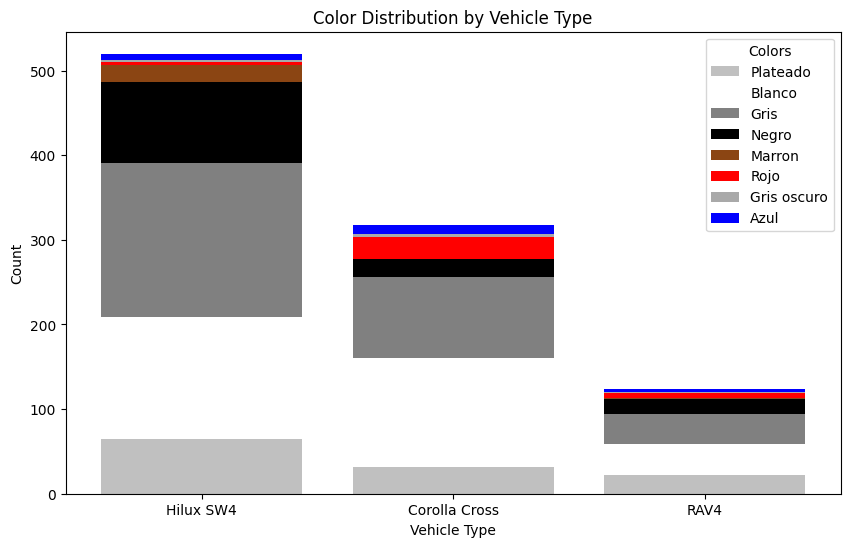

In [40]:
import matplotlib.pyplot as plt
import numpy as np

vehicle_types = ['Hilux SW4', 'Corolla Cross', 'RAV4']  # Tipos de vehículos
colors = ['Plateado', 'Blanco', 'Gris', 'Negro', 'Marron', 'Rojo', 'Gris oscuro', 'Azul']  # Colores

# Colores personalizados para que coincidan con los colores reales
color_palette = {
    'Plateado': '#C0C0C0',
    'Blanco': '#FFFFFF',
    'Gris': '#808080',
    'Negro': '#000000',
    'Marron': '#8B4513',
    'Rojo': '#FF0000',
    'Gris oscuro': '#A9A9A9',
    'Azul': '#0000FF'
}

# Suma los valores de cada color para cada tipo de vehículo
color_distribution = np.zeros((len(vehicle_types), len(colors)))

for i in range(len(vehicle_types)):
    for j in range(len(colors)):
        color_distribution[i, j] = np.sum(color_cols[vehicle_type_col == (i + 1), j])

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Generar barras apiladas con los colores personalizados
bottom = np.zeros(len(vehicle_types))
for i, color in enumerate(colors):
    ax.bar(vehicle_types, color_distribution[:, i], label=color, color=color_palette[color], bottom=bottom)
    bottom += color_distribution[:, i]

plt.title('Color Distribution by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.legend(title='Colors')
plt.show()


B

1.

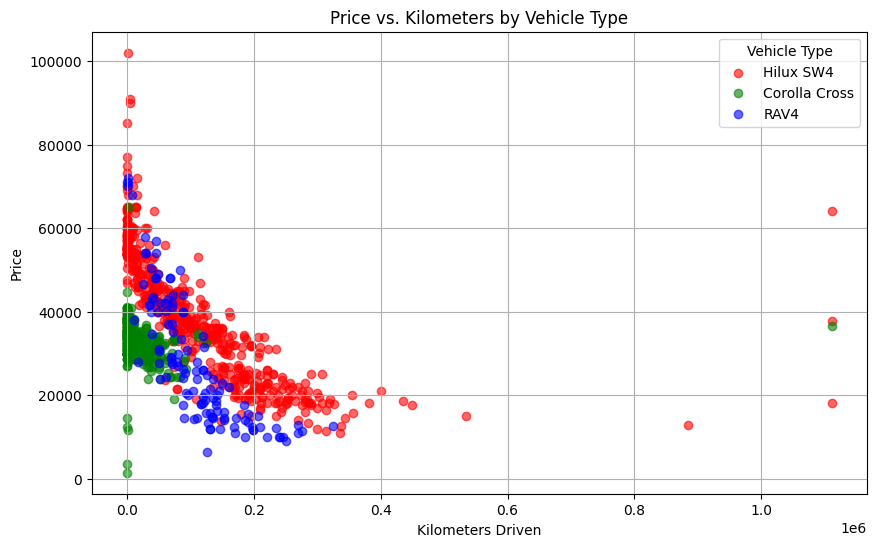

In [41]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes las columnas correspondientes
vehicle_types = ['Hilux SW4', 'Corolla Cross', 'RAV4']

# Crear un color diferente para cada tipo de vehículo
colors = ['red', 'green', 'blue']
vehicle_type_col = vehicle_type_col.flatten()  # Asegurarte de que la columna esté plana

plt.figure(figsize=(10, 6))

for i, vehicle_type in enumerate(vehicle_types):
    plt.scatter(
        kilometers_col[vehicle_type_col == (i + 1)],
        price_col[vehicle_type_col == (i + 1)],
        color=colors[i],
        label=vehicle_type,
        alpha=0.6
    )

plt.title('Price vs. Kilometers by Vehicle Type')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()


2.

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_1192/3557906824.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(price_data_by_type, labels=vehicle_types, patch_artist=True)


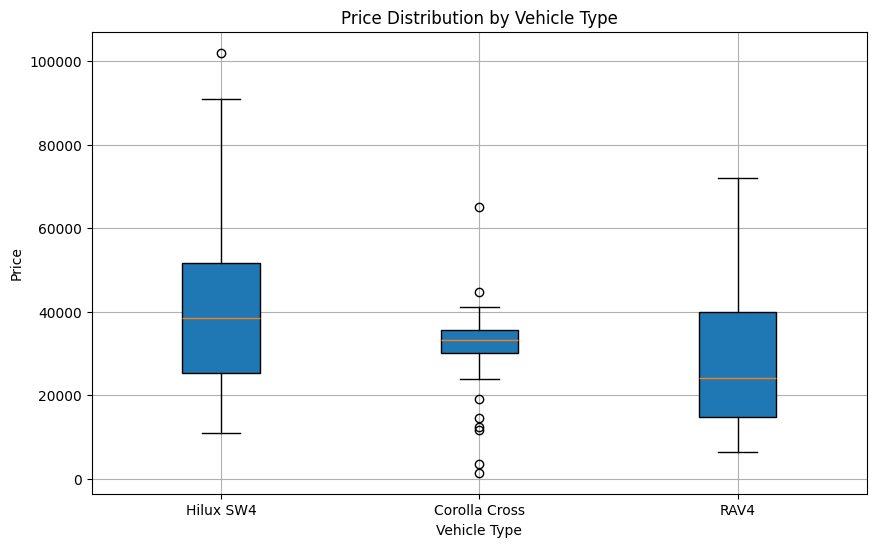

In [42]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes las columnas correspondientes
vehicle_types = ['Hilux SW4', 'Corolla Cross', 'RAV4']

# Crear una lista para almacenar los precios por tipo de vehículo
price_data_by_type = []

for i in range(1, 4):  # Asumiendo que 1: 'Hilux SW4', 2: 'Corolla Cross', 3: 'RAV4'
    prices_for_type = price_col[vehicle_type_col == i]
    price_data_by_type.append(prices_for_type)

# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(price_data_by_type, labels=vehicle_types, patch_artist=True)

plt.title('Price Distribution by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()


La Hilux SW4 tiene una mayor variabilidad en los precios y presenta al menos un outlier en la parte superior. La Corolla Cross tiene la menor variabilidad en precios, pero con varios outliers en ambos extremos, lo que sugiere que hay vehículos con precios significativamente más bajos o más altos de lo normal. La RAV4 muestra una variabilidad considerable y ningún outlier.


3. 

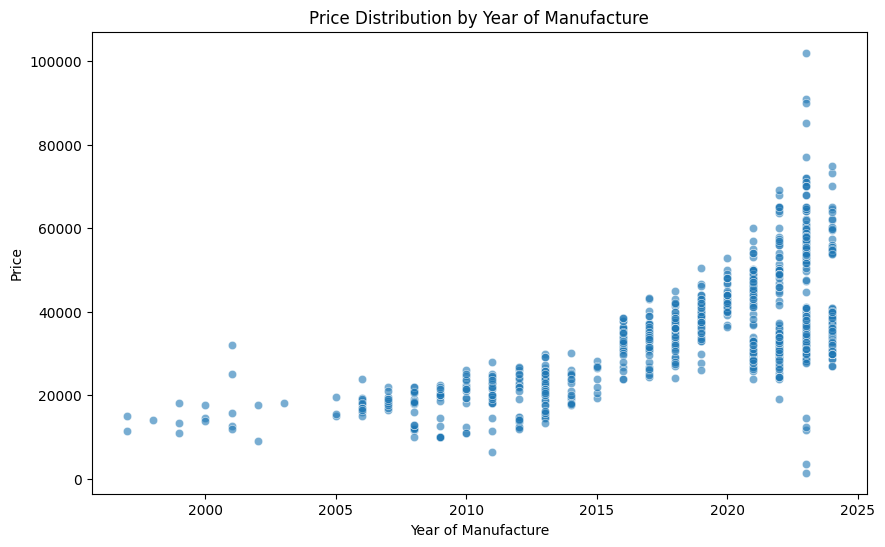

In [43]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes tus datos en las variables correspondientes
# year_col es la columna con los años de los vehículos
# price_col es la columna con los precios de venta

plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión
plt.scatter(year_col, price_col, alpha=0.6, edgecolors='w', linewidth=0.5)

# Añadir título y etiquetas
plt.title('Price Distribution by Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')

# Mostrar el gráfico
plt.show()


4. 

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_1192/1011830938.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[color_cols[:, i] == 1] for i in range(len(colors))], labels=colors)


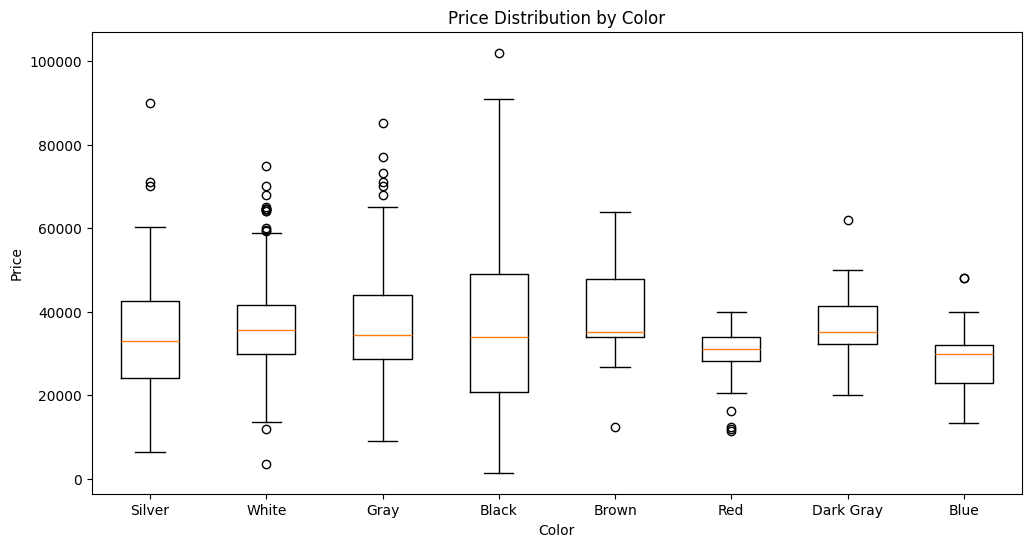

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_1192/1011830938.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[(color_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(colors))], labels=colors)


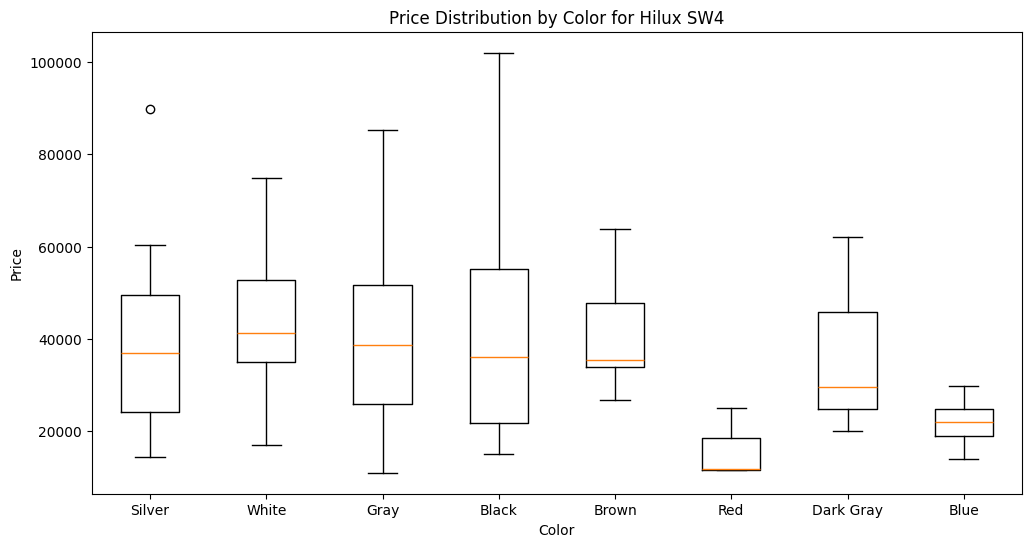

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_1192/1011830938.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[(color_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(colors))], labels=colors)


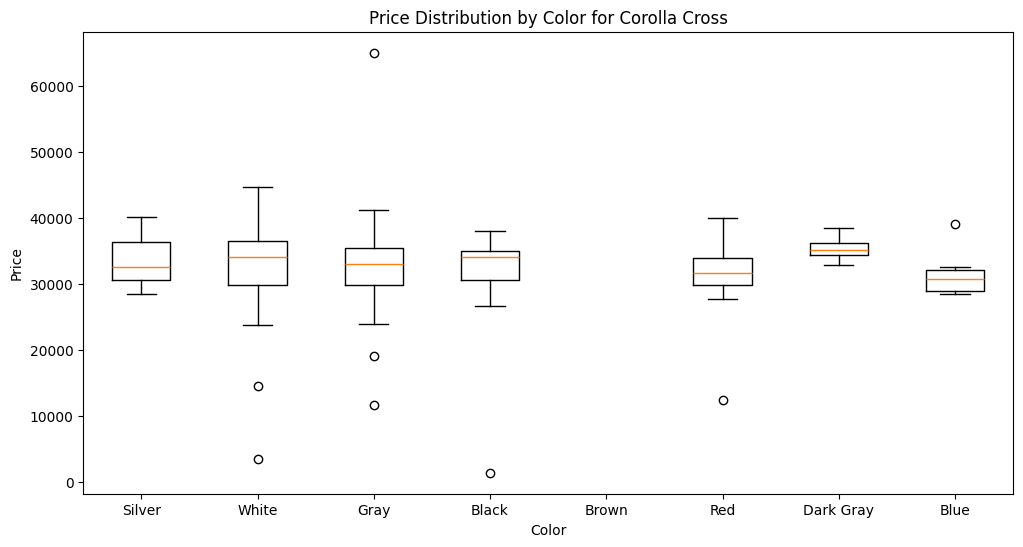

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_1192/1011830938.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[(color_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(colors))], labels=colors)


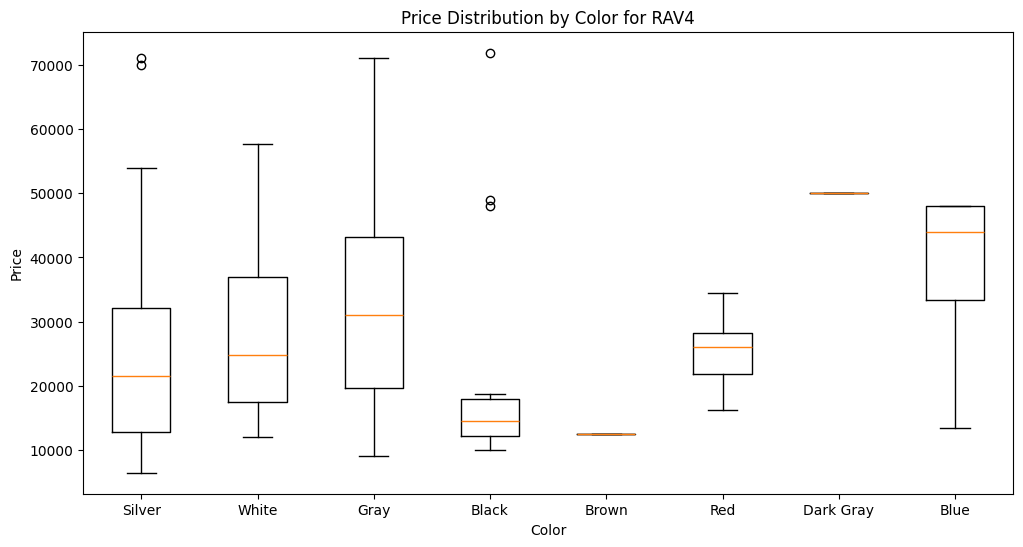

In [45]:
import matplotlib.pyplot as plt

colors = ['Silver', 'White', 'Gray', 'Black', 'Brown', 'Red', 'Dark Gray', 'Blue']

plt.figure(figsize=(12, 6))
plt.boxplot([price_col[color_cols[:, i] == 1] for i in range(len(colors))], labels=colors)
plt.title('Price Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

models = ['Hilux SW4', 'Corolla Cross', 'RAV4']
for i, model in enumerate(models):
    plt.figure(figsize=(12, 6))
    plt.boxplot([price_col[(color_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(colors))], labels=colors)
    plt.title(f'Price Distribution by Color for {model}')
    plt.xlabel('Color')
    plt.ylabel('Price')
    plt.show()


5. 

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_1192/3766138591.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[fuel_type_cols[:, i] == 1] for i in range(len(fuel_types))], labels=fuel_types)


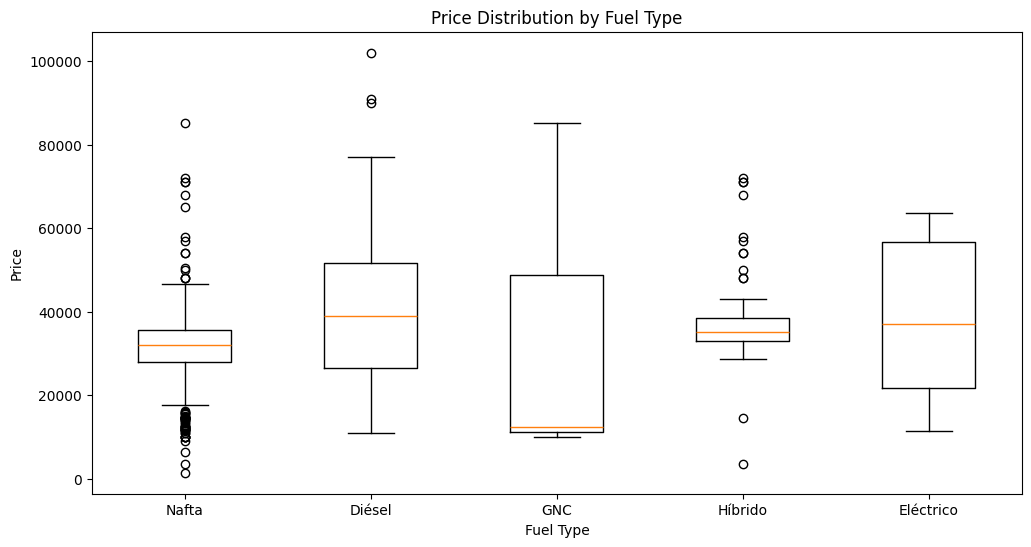

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_1192/3766138591.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[(fuel_type_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(fuel_types))], labels=fuel_types)


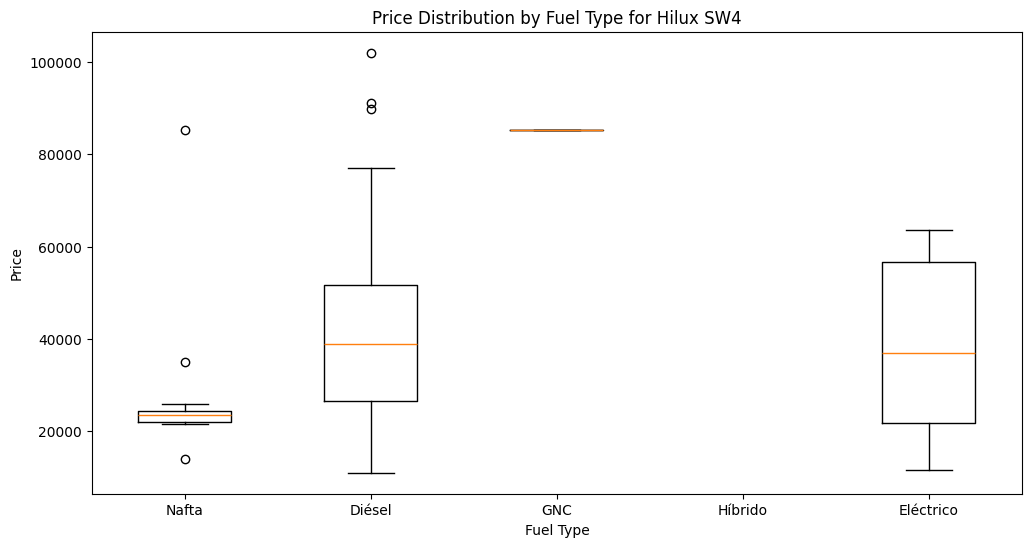

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_1192/3766138591.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[(fuel_type_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(fuel_types))], labels=fuel_types)


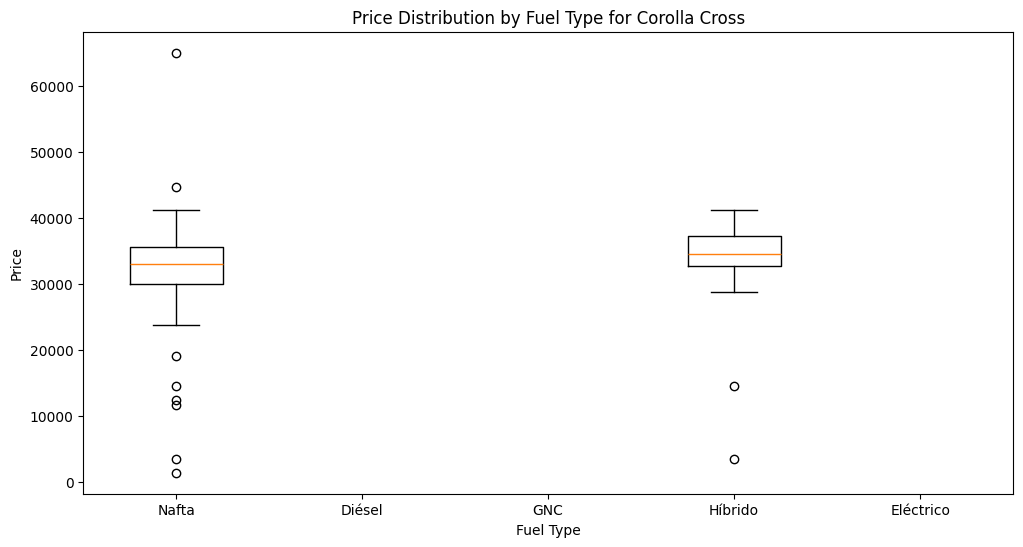

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_1192/3766138591.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[(fuel_type_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(fuel_types))], labels=fuel_types)


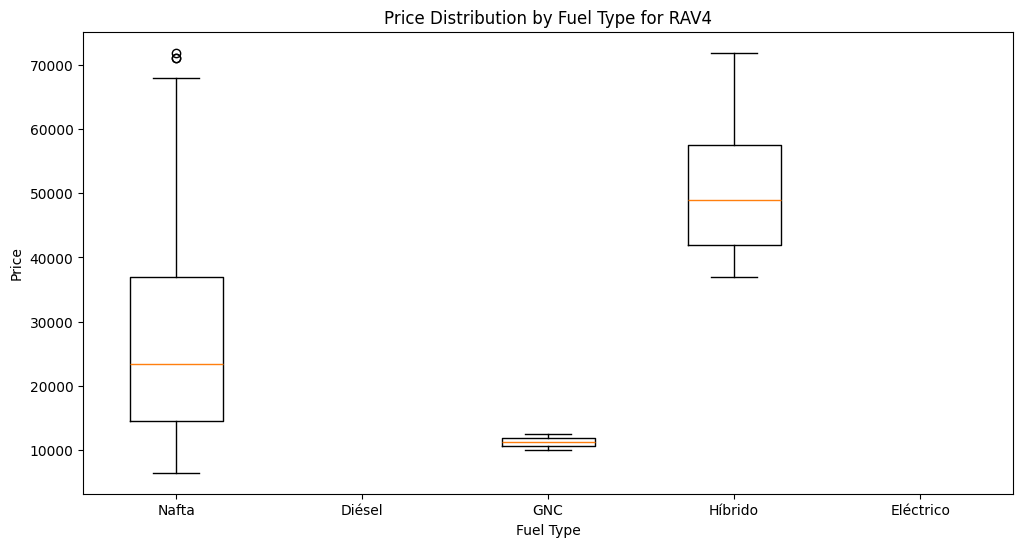

In [74]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes tus datos en las variables correspondientes:
# price_col es la columna con los precios de venta
# fuel_type_cols es la lista de columnas que representa cada tipo de combustible con un valor binario (0 o 1)

# Tipos de combustible considerados en el análisis
fuel_types = ['Nafta', 'Diésel', 'GNC', 'Híbrido', 'Eléctrico']  # Ajusta según corresponda

# Crear un boxplot para cada tipo de combustible
plt.figure(figsize=(12, 6))
plt.boxplot([price_col[fuel_type_cols[:, i] == 1] for i in range(len(fuel_types))], labels=fuel_types)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

# Análisis por modelo específico
models = ['Hilux SW4', 'Corolla Cross', 'RAV4']
for i, model in enumerate(models):
    plt.figure(figsize=(12, 6))
    plt.boxplot([price_col[(fuel_type_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(fuel_types))], labels=fuel_types)
    plt.title(f'Price Distribution by Fuel Type for {model}')
    plt.xlabel('Fuel Type')
    plt.ylabel('Price')
    plt.show()


6. 